In [94]:
using DifferentialEquations;

using ArgParse; # Argument parsing

# Benchmarking & profiling packages
using BenchmarkTools;
using StatProfilerHTML;

# Visualization packages
using DataFrames;
using Plots;
using Gadfly;
using Cairo;
using JLD;

using Statistics;
using ColorSchemes;
using HypothesisTests;
# using PlotlyJS;
using StatsPlots;


In [95]:
# Constant Params
# Define number of species for each module
#---------------------------------------------
const RECEPTOR_SPECIES = 20-2; #-2 because NFKB_SPECIES start from 3
const NFKB_SPECIES = 106;
const DIFF_SPECIES = 4;
const APOPTOSIS_SPECIES = 59;
const PROLIF_SPECIES = 25;
const TOTAL_SPECIES = RECEPTOR_SPECIES + NFKB_SPECIES + DIFF_SPECIES + APOPTOSIS_SPECIES + PROLIF_SPECIES + 1;


# Define indices for Receptor species
#-------------------------------------------------------------------------------------------------------------------
# 1 : ANTIGEN
const ANTIGEN = 1;
# 2 : BCR
const BCR = 2;
# 3 : Antigen-BCR
const ABCR = 3;
# 4 : inactivated CBM
const CBM = 4;
# 5 : activated CBM-complex
const ACBM = 5;
# 6 : inhibited CBM
const ICBM = 6;

# 7 : CD40L
const CD40L = 7;
# 8 : CD40R
const CD40R = 8;
# 9 : CD40L-R complex
const CD40LR = 9;
# 10 : TRAF6_off
const TRAF6_OFF = 10;
# 11 : TRAF6
const TRAF6 = 11;
# 12 : TRAF3-cIAP1/2 complex
const TRAF3 = 12;

# 13 : TAK1
const TAK1 = 13;
# 14 : activated TAK1
const ATAK1 = 14;
# 15 : IKK (IKK1)
const IKK_OFF = 15;
# 16 : pIKK (IKK2)
const IKK2 = 16;
# 17 : ppIKK (IKK3)
const IKK3 = 17;
# 18 : pppIKK (IKK4)
const IIKK = 18;
# 19 : total activated IKK (IKK2+IKK3)
const IKK = 19;
# 20 : NIK
const NIK = 20;

# Define indices for NFkB species
#-------------------------------------------------------------------------------------------------------------------
# 3 : tIkBa
const TIKBA = 3+RECEPTOR_SPECIES;
# 4 : tIkBb
const TIKBB = 4+RECEPTOR_SPECIES;
# 5 : tIkBe
const TIKBE = 5+RECEPTOR_SPECIES;
# 6 : IkBa
const IKBA = 6+RECEPTOR_SPECIES;
# 7 : IkBb
const IKBB = 7+RECEPTOR_SPECIES;
# 8 : IkBe
const IKBE = 8+RECEPTOR_SPECIES;
# 9 : IkBd
const IKBD = 9+RECEPTOR_SPECIES;
# 10 : IkBan
const NIKBA = 10+RECEPTOR_SPECIES;
# 11 : IkBbn
const NIKBB = 11+RECEPTOR_SPECIES;
# 12 : IkBen
const NIKBE = 12+RECEPTOR_SPECIES;
# 13 : IkBdn
const NIKBD = 13+RECEPTOR_SPECIES;
# 14 : tRelA
const TRELA = 14+RECEPTOR_SPECIES;
# 15 : tp50
const TP50 = 15+RECEPTOR_SPECIES;
# 16 : tRelB
const TRELB = 16+RECEPTOR_SPECIES;
# 17 : tP100
const TP100 = 17+RECEPTOR_SPECIES;
# 18 : tcRel
const TCREL = 18+RECEPTOR_SPECIES;
# 19 : RelA
const RELA = 19+RECEPTOR_SPECIES;
# 20 : p50
const P50 = 20+RECEPTOR_SPECIES;
# 21 : RelB
const RELB = 21+RECEPTOR_SPECIES;
# 22 : P100
const P100 = 22+RECEPTOR_SPECIES;
# 23 : cRel
const CREL = 23+RECEPTOR_SPECIES;
# 24 : P52
const P52 = 24+RECEPTOR_SPECIES;
# 25 : RelAn
const NRELA = 25+RECEPTOR_SPECIES;
# 26 : p50n
const NP50 = 26+RECEPTOR_SPECIES;
# 27 : nRelB
const NRELB = 27+RECEPTOR_SPECIES;
# 28 : nP100
const NP100 = 28+RECEPTOR_SPECIES;
# 29 : cReln
const NCREL = 29+RECEPTOR_SPECIES;
# 30 : nP52
const NP52 = 30+RECEPTOR_SPECIES;
# 31 : RelA:RelA
const AA = 31+RECEPTOR_SPECIES;
# 32 : RelA:p50
const A50 = 32+RECEPTOR_SPECIES;
# 33 : RelA:p52
const A52 = 33+RECEPTOR_SPECIES;
# 34 : RelB:p50
const B50 = 34+RECEPTOR_SPECIES;
# 35 : RelB:p52
const B52 = 35+RECEPTOR_SPECIES;
# 36 : cRel:p50
const C50 = 36+RECEPTOR_SPECIES;
# 37 : cRel:p52
const C52 = 37+RECEPTOR_SPECIES;
# 38 : cRel:p100
const C100 = 38+RECEPTOR_SPECIES;
# 39 : p50:p50
const P50P50 = 39+RECEPTOR_SPECIES;
# 40 : p52:p52
const P52P52 = 40+RECEPTOR_SPECIES;
# 41 : RelA:RelAn
const NAA = 41+RECEPTOR_SPECIES;
# 42 : RelA:p50n
const NA50 = 42+RECEPTOR_SPECIES;
# 43 : RelA:p52n
const NA52 = 43+RECEPTOR_SPECIES;
# 44 : RelB:p50n
const NB50 = 44+RECEPTOR_SPECIES;
# 45 : RelB:p52n
const NB52 = 45+RECEPTOR_SPECIES;
# 46 : cRel:p50n
const NC50 = 46+RECEPTOR_SPECIES;
# 47 : cRel:p52n
const NC52 = 47+RECEPTOR_SPECIES;
# 48 : cRel:p100n
const NC100 = 48+RECEPTOR_SPECIES;
# 49 : p50:p50n
const NP50P50 = 49+RECEPTOR_SPECIES;
# 50 : p52:p52n
const NP52P52 = 50+RECEPTOR_SPECIES;
# 51 : IkBa-RelA:RelA
const IKBAAA = 51+RECEPTOR_SPECIES;
# 52 : IkBb-RelA:RelA
const IKBBAA = 52+RECEPTOR_SPECIES;
# 53 : IkBe-RelA:RelA
const IKBEAA = 53+RECEPTOR_SPECIES;
# 54 : IkBd-RelA:RelA
const IKBDAA = 54+RECEPTOR_SPECIES;
# 55 : IkBa-RelA:RelAn
const NIKBAAA = 55+RECEPTOR_SPECIES;
# 56 : IkBb-RelA:RelAn
const NIKBBAA = 56+RECEPTOR_SPECIES;
# 57 : IkBe-RelA:RelAn
const NIKBEAA = 57+RECEPTOR_SPECIES;
# 58 : IkBd-RelA:RelAn
const NIKBDAA = 58+RECEPTOR_SPECIES;
# 59 : IkBa-RelA:p50
const IKBAA50 = 59+RECEPTOR_SPECIES;
# 60 : IkBb-RelA:p50
const IKBBA50 = 60+RECEPTOR_SPECIES;
# 61 : IkBe-RelA:p50
const IKBEA50 = 61+RECEPTOR_SPECIES;
# 62 : IkBd-RelA:p50
const IKBDA50 = 62+RECEPTOR_SPECIES;
# 63 : IkBa-RelA:p50n
const NIKBAA50 = 63+RECEPTOR_SPECIES;
# 64 : IkBb-RelA:p50n
const NIKBBA50 = 64+RECEPTOR_SPECIES;
# 65 : IkBe-RelA:p50n
const NIKBEA50 = 65+RECEPTOR_SPECIES;
# 66 : IkBd-RelA:p50n
const NIKBDA50 = 66+RECEPTOR_SPECIES;
# 67 : IkBa-RelA:p52
const IKBAA52 = 67+RECEPTOR_SPECIES;
# 68 : IkBb-RelA:p52
const IKBBA52 = 68+RECEPTOR_SPECIES;
# 69 : IkBe-RelA:p52
const IKBEA52 = 69+RECEPTOR_SPECIES;
# 70 : IkBd-RelA:p52
const IKBDA52 = 70+RECEPTOR_SPECIES;
# 71 : IkBa-RelA:p52n
const NIKBAA52 = 71+RECEPTOR_SPECIES;
# 72 : IkBb-RelA:p52n
const NIKBBA52 = 72+RECEPTOR_SPECIES;
# 73 : IkBe-RelA:p52n
const NIKBEA52 = 73+RECEPTOR_SPECIES;
# 74 : IkBd-RelA:p52n
const NIKBDA52 = 74+RECEPTOR_SPECIES;
# 75 : IkBa-RelB:p50
const IKBAB50 = 75+RECEPTOR_SPECIES;
# 76 : IkBb-RelB:p50
const IKBBB50 = 76+RECEPTOR_SPECIES;
# 77 : IkBe-RelB:p50
const IKBEB50 = 77+RECEPTOR_SPECIES;
# 78 : IkBd-RelB:p50
const IKBDB50 = 78+RECEPTOR_SPECIES;
# 79 : IkBa-RelB:p50n
const NIKBAB50 = 79+RECEPTOR_SPECIES;
# 80 : IkBb-RelB:p50n
const NIKBBB50 = 80+RECEPTOR_SPECIES;
# 81 : IkBe-RelB:p50n
const NIKBEB50 = 81+RECEPTOR_SPECIES;
# 82 : IkBd-RelB:p50n
const NIKBDB50 = 82+RECEPTOR_SPECIES;
# 83 : IkBa-RelB:p52
const IKBAB52 = 83+RECEPTOR_SPECIES;
# 84 : IkBb-RelB:p52
const IKBBB52 = 84+RECEPTOR_SPECIES;
# 85 : IkBe-RelB:p52
const IKBEB52 = 85+RECEPTOR_SPECIES;
# 86 : IkBd-RelB:p52
const IKBDB52 = 86+RECEPTOR_SPECIES;
# 87 : IkBa-RelB:p52n
const NIKBAB52 = 87+RECEPTOR_SPECIES;
# 88 : IkBb-RelB:p52n
const NIKBBB52 = 88+RECEPTOR_SPECIES;
# 89 : IkBe-RelB:p52n
const NIKBEB52 = 89+RECEPTOR_SPECIES;
# 90 : IkBd-RelB:p52n
const NIKBDB52 = 90+RECEPTOR_SPECIES;
# 91 : IkBa-cRel:p50
const IKBAC50 = 91+RECEPTOR_SPECIES;
# 92 : IkBb-cRel:p50
const IKBBC50 = 92+RECEPTOR_SPECIES;
# 93 : IkBe-cRel:p50
const IKBEC50 = 93+RECEPTOR_SPECIES;
# 94 : IkBd-cRel:p50
const IKBDC50 = 94+RECEPTOR_SPECIES;
# 95 : IkBa-cRel:p50n
const NIKBAC50 = 95+RECEPTOR_SPECIES;
# 96 : IkBb-cRel:p50n
const NIKBBC50 = 96+RECEPTOR_SPECIES;
# 97 : IkBe-cRel:p50n
const NIKBEC50 = 97+RECEPTOR_SPECIES;
# 98 : IkBd-cRel:p50n
const NIKBDC50 = 98+RECEPTOR_SPECIES;
# 99 : IkBa-cRel:p52
const IKBAC52 = 99+RECEPTOR_SPECIES;
# 100 : IkBb-cRel:p52
const IKBBC52 = 100+RECEPTOR_SPECIES;
# 101 : IkBe-cRel:p52
const IKBEC52 = 101+RECEPTOR_SPECIES;
# 102 : IkBd-cRel:p52
const IKBDC52 = 102+RECEPTOR_SPECIES;
# 103 : IkBa-cRel:p52n
const NIKBAC52 = 103+RECEPTOR_SPECIES;
# 104 : IkBb-cRel:p52n
const NIKBBC52 = 104+RECEPTOR_SPECIES;
# 105 : IkBe-cRel:p52n
const NIKBEC52 = 105+RECEPTOR_SPECIES;
# 106 : IkBd-cRel:p52n
const NIKBDC52 = 106+RECEPTOR_SPECIES;



# Define indices for Differentiation species
#--------------------------------------------------------------------------------------------------------------------
# 1 : Pax-5
const PAX5 = 1+NFKB_SPECIES+RECEPTOR_SPECIES;
# 2 : Bcl-6
const BCL6 = 2+NFKB_SPECIES+RECEPTOR_SPECIES;
# 3 : Blimp-1
const BLIMP1 = 3+NFKB_SPECIES+RECEPTOR_SPECIES;
# 4 : IRF-4
const IRF4 = 4+NFKB_SPECIES+RECEPTOR_SPECIES;



# Define indices for Apoptosis species
#--------------------------------------------------------------------------------------------------------------------
# MODULE 1: Define indices for NFkB regulatory species
#--------------------------------------------
# 1 : tBCL2
const TBCL2 = 1+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 2: Define indices for Receptor & DISC system species
#--------------------------------------------
# 2 : L
const L = 2+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 3 : R
const R = 3+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 4 : L:R
const LR = 4+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 5 : DISC
const DISC = 5+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 6 : flip
const FLIP = 6+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 7 : flip:DISC
const FLIPDISC = 7+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 3: Define indices for CASPASE 8 module (initiator caspase) species
#--------------------------------------------
# 8 : pC8
const PC8 = 8+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 9 : DISC:pC8
const DISCPC8 = 9+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 10 : C8
const C8 = 10+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 11 : Bar
const BAR = 11+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 12 : Bar:C8
const BARC8 = 12+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 4: Define indices for species before Bax enter mitochondria
#--------------------------------------------
# 13 : Bid
const BID = 13+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 14 : C8:Bid
const C8BID = 14+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 15 : tBid
const TBID = 15+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 16 : cBcl2
const CBCL2 = 16+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 17 : cBcl2:tBid
const CBCL2TBID = 17+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 5: Define indices for species involved in the oligomerization of Bax
#--------------------------------------------
# 18 : Bax
const BAX = 18+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 19 : tBid:Bax
const TBIDBAX = 19+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 20 : aBax
const ABAX = 20+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 21 : mBax
const MBAX = 21+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 22 : Bcl2
const BCL2 = 22+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 23 : mBax:Bcl2
const MBAXBCL2 = 23+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 24 : Bax2
const BAX2 = 24+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 25 : Bax2:Bcl2
const BAX2BCL2 = 25+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 26 : Bax4
const BAX4 = 26+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 27 : Bax4:Bcl2
const BAX4BCL2 = 27+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 6: Define indices for MOMP (pore-forming and transporting) species
#--------------------------------------------
# 28 : Mito
const MITO = 28+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 29 : Bax4:Mito
const BAX4MITO = 29+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 30 : aMito
const AMITO = 30+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 31 : mCytoC
const MCYTOC = 31+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 32 : aMito:mCytoC
const AMITOMCYTOC = 32+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 33 : aCytoC
const ACYTOC = 33+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 34 : mSmac
const MSMAC = 34+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 35 : aMito:mSmac
const AMITOMSMAC = 35+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 36 : aSmac
const ASMAC = 36+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 7: Define indices for Feedforward pathway 1 (XIAP) species
#--------------------------------------------
# 37 : XIAP
const XIAP = 37+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 38 : cSmac
const CSMAC = 38+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 39 : cSmac:XIAP
const CSMACXIAP = 39+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 8: Define indices for Feedforward pathway 2 (Apoptosome) species
#--------------------------------------------
# 40 : cCytoC
const CCYTOC = 40+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 41 : Apaf
const APAF = 41+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 42 : Apaf:cCytoC
const APAFCCYTOC = 42+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 43 : aApaf
const AAPAF = 43+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 44 : pC9
const PC9 = 44+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 45 : Apop
const APOP = 45+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 46 : Apop:XIAP
const APOPXIAP = 46+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 9: Define indices for CASPASE 3 module (effector caspase) species
#--------------------------------------------
# 47 : pC3
const PC3 = 47+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 48 : C8:pC3
const C8PC3 = 48+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 49 : C3
const C3 = 49+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 50 : XIAP:C3
const XIAPC3 = 50+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 51 : Apop:pC3
const APOPPC3 = 51+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 52 : uC3
const UC3 = 52+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 10: Define indices for CASPASE 6 feedback module species
#--------------------------------------------
# 53 : pC6
const PC6 = 53+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 54 : C3:pC6
const C3PC6 = 54+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 55 : C6
const C6 = 55+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 56 : C6:pC8
const C6PC8 = 56+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;

# MODULE 11: Define indices for cell death species
#--------------------------------------------
# 57 : PARP
const PARP = 57+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 58 : C3:PARP
const C3PARP = 58+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 59 : tPARP
const CPARP = 59+NFKB_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;



# Define indices for Cell Cycle species
#--------------------------------------------------------------------------------------------------------------------
# 1 : tMyc
const TMYC = 1+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 2 : Myc
const MYC = 2+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 3 : tE2F
const TE2F = 3+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 4 : E2F
const E2F = 4+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 5 : Rb
const RB = 5+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 6 : ppRB
const PPRB = 6+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 7 : E2F:Rb
const E2FRB = 7+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 8* : tCycD (deprecated in new model)
const TCYCD = 8+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 9 : CycD
const CYCD = 9+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 10 : CycE
const CYCE = 10+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 11 : CycA
const CYCA = 11+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 12 : CycB
const CYCB = 12+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 13 : p27
const P27 = 13+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 14 : CycD:p27
const CYCDP27 = 14+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 15 : CycE:p27
const CYCEP27 = 15+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 16 : CycA:p27
const CYCAP27 = 16+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 17 : IEP
const IEP = 17+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 18 : PPX
const PPX = 18+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 19 : Cdc20 (total)
const CDC20 = 19+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 20 : Cdc20P (active)
const CDC20P = 20+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 21 : Cdh1
const CDH1 = 21+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
#----------------------------------------
# 22 : GM
const GM = 22+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 23 : Mass
const MASS = 23+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 24 : Rb growth switch
const RBGS = 24+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;
# 25 : Generations
const GEN = 25+NFKB_SPECIES+APOPTOSIS_SPECIES+DIFF_SPECIES+RECEPTOR_SPECIES;




# Define species names
#--------------------------------------------------------------------------------------------------------------------
speciesNames = Array{String,1}(undef, TOTAL_SPECIES);

# Receptor layer :
#--------------------------------------------------------------------------------------------------------------------
# 1 : Antigen
speciesNames[ANTIGEN] = "Antigen";
# 2 : B-cell Receptor
speciesNames[BCR] = "B-cell Receptor";
# 3 : Antigen-BCR complex
speciesNames[ABCR] = "Antigen-BCR";
# 4 : inactivated CBM complex
speciesNames[CBM] = "inactivated CBM";
# 5 : activated CBM complex
speciesNames[ACBM] = "activated CBM";
# 6 : inhibited CBM complex
speciesNames[ICBM] = "inhibited CBM";

# 7 : CD40 ligand
speciesNames[CD40L] = "CD40 ligand";
# 8 : CD40 receptor
speciesNames[CD40R] = "CD40 receptor";
# 9 : CD40L-R complex
speciesNames[CD40LR] = "CD40L-R complex";
# 10 : inactivated TRAF6
speciesNames[TRAF6_OFF] = "inactivated TRAF6";
# 11 : activated TRAF6
speciesNames[TRAF6] = "activated TRAF6";

# 12 : inactivated TAK1
speciesNames[TAK1] = "inactivated TAK1";
# 13 : activated TAK1
speciesNames[ATAK1] = "activated TAK1";
# 14 : inactivated IKK
speciesNames[IKK_OFF] = "inactivated IKK";
# 15 : activated pIKK
speciesNames[IKK2] = "activated pIKK";
# 16 : activated ppIKK
speciesNames[IKK3] = "activated ppIKK";
# 17 : inhibited IKK
speciesNames[IIKK] = "inhibited pppIKK";
# 18 : activated IKK
speciesNames[IKK] = "total activated IKK";
# 19 : TRAF3-cIAP1/2 complex
speciesNames[TRAF3] = "TRAF3-cIAP1/2 complex";
# 20 : NIK
speciesNames[NIK] = "NIK";


# NFkB layer :
#--------------------------------------------------------------------------------------------------------------------
# 3 : IkBa transcript
speciesNames[TIKBA] = "IkBa transcript";
# 4 : IkBb transcript
speciesNames[TIKBB] = "IkBb transcript";
# 5 : IkBe transcript
speciesNames[TIKBE] = "IkBe transcript";
# 6 : IkBa protein
speciesNames[IKBA] = "IkBa protein";
# 7 : IkBb protein
speciesNames[IKBB] = "IkBb protein";
# 8 : IkBe protein
speciesNames[IKBE] = "IkBe protein";
# 9 : IkBd protein
speciesNames[IKBD] = "IkBd protein";
# 10 : nuclear IkBa
speciesNames[NIKBA] = "nuclear IkBa";
# 11 : nuclear IkBb
speciesNames[NIKBB] = "nuclear IkBb";
# 12 : nuclear IkBe
speciesNames[NIKBE] = "nuclear IkBe";
# 13 : nuclear IkBd
speciesNames[NIKBD] = "nuclear IkBd";
# 14 : RelA transcript
speciesNames[TRELA] = "RelA transcript";
# 15 : p50 transcript
speciesNames[TP50] = "p50 transcript";
# 16 : RelB transcript
speciesNames[TRELB] = "RelB transcript";
# 17 : P100 transcript
speciesNames[TP100] = "P100 transcript";
# 18 : cRel transcript
speciesNames[TCREL] = "cRel transcript";
# 19 : RelA protein
speciesNames[RELA] = "RelA protein";
# 20 : p50 protein
speciesNames[P50] = "p50 protein";
# 21 : RelB protein
speciesNames[RELB] = "RelB protein";
# 22 : P100 protein
speciesNames[P100] = "P100 protein";
# 23 : cRel protein
speciesNames[CREL] = "cRel protein";
# time_range : P52 protein
speciesNames[P52] = "P52 protein";
# 25 : nuclear RelA
speciesNames[NRELA] = "nuclear RelA";
# 26 : nuclear p50
speciesNames[NP50] = "nuclear p50";
# 27 : nuclear RelB
speciesNames[NRELB] = "nuclear RelB";
# 28 : nuclear P100
speciesNames[NP100] = "nuclear P100";
# 29 : nuclear cRel
speciesNames[NCREL] = "nuclear cRel";
# 30 : nuclear P52
speciesNames[NP52] = "nuclear P52";
# 31 : RelA:RelA protein
speciesNames[AA] = "RelA:RelA protein";
# 32 : RelA:p50 protein
speciesNames[A50] = "RelA:p50 protein";
# 33 : RelA:p52 protein
speciesNames[A52] = "RelA:p52 protein";
# 34 : RelB:p50 protein
speciesNames[B50] = "RelB:p50 protein";
# 35 : RelB:p52 protein
speciesNames[B52] = "RelB:p52 protein";
# 36 : cRel:p50 protein
speciesNames[C50] = "cRel:p50 protein";
# 37 : cRel:p52 protein
speciesNames[C52] = "cRel:p52 protein";
# 38 : cRel:p100 protein
speciesNames[C100] = "cRel:p100 protein";
# 39 : p50:p50 protein
speciesNames[P50P50] = "p50:p50 protein";
# 40 : p52:p52 protein
speciesNames[P52P52] = "p52:p52 protein";
# 41 : nuclear RelA:RelA
speciesNames[NAA] = "nuclear RelA:RelA";
# 42 : nuclear RelA:p50
speciesNames[NA50] = "nuclear RelA:p50";
# 43 : nuclear RelA:p52
speciesNames[NA52] = "nuclear RelA:p52";
# 44 : nuclear RelB:p50
speciesNames[NB50] = "nuclear RelB:p50";
# 45 : nuclear RelB:p52
speciesNames[NB52] = "nuclear RelB:p52";
# 46 : nuclear cRel:p50
speciesNames[NC50] = "nuclear cRel:p50";
# 47 : nuclear cRel:p52
speciesNames[NC52] = "nuclear cRel:p52";
# 48 : nuclear cRel:p100
speciesNames[NC100] = "nuclear cRel:p100";
# 49 : nuclear p50:p50
speciesNames[NP50P50] = "nuclear p50:p50";
# 50 : nuclear p52:p52
speciesNames[NP52P52] = "nuclear p52:p52";
# 51 : IkBa-RelA:RelA protein
speciesNames[IKBAAA] = "IkBa-RelA:RelA protein";
# 52 : IkBb-RelA:RelA protein
speciesNames[IKBBAA] = "IkBb-RelA:RelA protein";
# 53 : IkBe-RelA:RelA protein
speciesNames[IKBEAA] = "IkBe-RelA:RelA protein";
# 54 : IkBd-RelA:RelA protein
speciesNames[IKBDAA] = "IkBd-RelA:RelA protein";
# 55 : nuclear IkBa-RelA:RelA
speciesNames[NIKBAAA] = "nuclear IkBa-RelA:RelA";
# 56 : nuclear IkBb-RelA:RelA
speciesNames[NIKBBAA] = "nuclear IkBb-RelA:RelA";
# 57 : nuclear IkBe-RelA:RelA
speciesNames[NIKBEAA] = "nuclear IkBe-RelA:RelA";
# 58 : nuclear IkBd-RelA:RelA
speciesNames[NIKBDAA] = "nuclear IkBd-RelA:RelA";
# 59 : IkBa-RelA:p50 protein
speciesNames[IKBAA50] = "IkBa-RelA:p50 protein";
# 60 : IkBb-RelA:p50 protein
speciesNames[IKBBA50] = "IkBb-RelA:p50 protein";
# 61 : IkBe-RelA:p50 protein
speciesNames[IKBEA50] = "IkBe-RelA:p50 protein";
# 62 : IkBd-RelA:p50 protein
speciesNames[IKBDA50] = "IkBd-RelA:p50 protein";
# 63 : nuclear IkBa-RelA:p50
speciesNames[NIKBAA50] = "nuclear IkBa-RelA:p50";
# 64 : nuclear IkBb-RelA:p50
speciesNames[NIKBBA50] = "nuclear IkBb-RelA:p50";
# 65 : nuclear IkBe-RelA:p50
speciesNames[NIKBEA50] = "nuclear IkBe-RelA:p50";
# 66 : nuclear IkBd-RelA:p50
speciesNames[NIKBDA50] = "nuclear IkBd-RelA:p50";
# 67 : IkBa-RelA:p52 protein
speciesNames[IKBAA52] = "IkBa-RelA:p52 protein";
# 68 : IkBb-RelA:p52 protein
speciesNames[IKBBA52] = "IkBb-RelA:p52 protein";
# 69 : IkBe-RelA:p52 protein
speciesNames[IKBEA52] = "IkBe-RelA:p52 protein";
# 70 : IkBd-RelA:p52 protein
speciesNames[IKBDA52] = "IkBd-RelA:p52 protein";
# 71 : nuclear IkBa-RelA:p52
speciesNames[NIKBAA52] = "nuclear IkBa-RelA:p52";
# 72 : nuclear IkBb-RelA:p52
speciesNames[NIKBBA52] = "nuclear IkBb-RelA:p52";
# 73 : nuclear IkBe-RelA:p52
speciesNames[NIKBEA52] = "nuclear IkBe-RelA:p52";
# 74 : nuclear IkBd-RelA:p52
speciesNames[NIKBDA52] = "nuclear IkBd-RelA:p52";
# 75 : IkBa-RelB:p50 protein
speciesNames[IKBAB50] = "IkBa-RelB:p50 protein";
# 76 : IkBb-RelB:p50 protein
speciesNames[IKBBB50] = "IkBb-RelB:p50 protein";
# 77 : IkBe-RelB:p50 protein
speciesNames[IKBEB50] = "IkBe-RelB:p50 protein";
# 78 : IkBd-RelB:p50 protein
speciesNames[IKBDB50] = "IkBd-RelB:p50 protein";
# 79 : nuclear IkBa-RelB:p50
speciesNames[NIKBAB50] = "nuclear IkBa-RelB:p50";
# 80 : nuclear IkBb-RelB:p50
speciesNames[NIKBBB50] = "nuclear IkBb-RelB:p50";
# 81 : nuclear IkBe-RelB:p50
speciesNames[NIKBEB50] = "nuclear IkBe-RelB:p50";
# 82 : nuclear IkBd-RelB:p50
speciesNames[NIKBDB50] = "nuclear IkBd-RelB:p50";
# 83 : IkBa-RelB:p52 protein
speciesNames[IKBAB52] = "IkBa-RelB:p52 protein";
# 84 : IkBb-RelB:p52 protein
speciesNames[IKBBB52] = "IkBb-RelB:p52 protein";
# 85 : IkBe-RelB:p52 protein
speciesNames[IKBEB52] = "IkBe-RelB:p52 protein";
# 86 : IkBd-RelB:p52 protein
speciesNames[IKBDB52] = "IkBd-RelB:p52 protein";
# 87 : nuclear IkBa-RelB:p52
speciesNames[NIKBAB52] = "nuclear IkBa-RelB:p52";
# 88 : nuclear IkBb-RelB:p52
speciesNames[NIKBBB52] = "nuclear IkBb-RelB:p52";
# 89 : nuclear IkBe-RelB:p52
speciesNames[NIKBEB52] = "nuclear IkBe-RelB:p52";
# 90 : nuclear IkBd-RelB:p52
speciesNames[NIKBDB52] = "nuclear IkBd-RelB:p52";
# 91 : IkBa-cRel:p50 protein
speciesNames[IKBAC50] = "IkBa-cRel:p50 protein";
# 92 : IkBb-cRel:p50 protein
speciesNames[IKBBC50] = "IkBb-cRel:p50 protein";
# 93 : IkBe-cRel:p50 protein
speciesNames[IKBEC50] = "IkBe-cRel:p50 protein";
# 94 : IkBd-cRel:p50 protein
speciesNames[IKBDC50] = "IkBd-cRel:p50 protein";
# 95 : nuclear IkBa-cRel:p50
speciesNames[NIKBAC50] = "nuclear IkBa-cRel:p50";
# 96 : nuclear IkBb-cRel:p50
speciesNames[NIKBBC50] = "nuclear IkBb-cRel:p50";
# 97 : nuclear IkBe-cRel:p50
speciesNames[NIKBEC50] = "nuclear IkBe-cRel:p50";
# 98 : nuclear IkBd-cRel:p50
speciesNames[NIKBDC50] = "nuclear IkBd-cRel:p50";
# 99 : IkBa-cRel:p52 protein
speciesNames[IKBAC52] = "IkBa-cRel:p52 protein";
# 100 : IkBb-cRel:p52 protein
speciesNames[IKBBC52] = "IkBb-cRel:p52 protein";
# 101 : IkBe-cRel:p52 protein
speciesNames[IKBEC52] = "IkBe-cRel:p52 protein";
# 102 : IkBd-cRel:p52 protein
speciesNames[IKBDC52] = "IkBd-cRel:p52 protein";
# 103 : nuclear IkBa-cRel:p52
speciesNames[NIKBAC52] = "nuclear IkBa-cRel:p52";
# 104 : nuclear IkBb-cRel:p52
speciesNames[NIKBBC52] = "nuclear IkBb-cRel:p52";
# 105 : nuclear IkBe-cRel:p52
speciesNames[NIKBEC52] = "nuclear IkBe-cRel:p52";
# 106 : nuclear IkBd-cRel:p52
speciesNames[NIKBDC52] = "nuclear IkBd-cRel:p52";


# Apoptosis layer :
#--------------------------------------------------------------------------------------------------------------------
# MODULE 1: Input signals :
# 01 : RelA
speciesNames[RELA] = "NF-kB RelA";
# 02 : cRel
speciesNames[CREL] = "NF-kB cRel";
# 03 : Bcl2t
speciesNames[TBCL2] = "Bcl2 transcript";
#------------------------------------------------
# MODULE 2: Receptor & DISC system species :
# 04 : L
speciesNames[L] = "L";
# 05 : R
speciesNames[R] = "R";
# 06 : L-R
speciesNames[LR] = "L-R";
# 07 : DISC
speciesNames[DISC] = "DISC";
# 08 : flip
speciesNames[FLIP] = "flip";
# 09 : flip:DISC
speciesNames[FLIPDISC] = "flip:DISC";
#--------------------------------------------
# MODULE 3: CASPASE 8 module (initiator caspase) species :
# 10 : pC8
speciesNames[PC8] = "pC8";
# 11 : DISC:pC8
speciesNames[DISCPC8] = "DISC:pC8";
# 12 : C8
speciesNames[C8] = "C8";
# 13 : Bar
speciesNames[BAR] = "Bar";
# 14 : Bar:C8
speciesNames[BARC8] = "Bar:C8";
#--------------------------------------------
# MODULE 4: species before Bax enter mitochondria :
# 15 : Bid
speciesNames[BID] = "Bid";
# 16 : C8:Bid
speciesNames[C8BID] = "C8:Bid";
# 17 : tBid
speciesNames[TBID] = "tBid";
# 18 : cBcl2
speciesNames[CBCL2] = "cBcl2";
# 19 : cBcl2:tBid
speciesNames[CBCL2TBID] = "cBcl2:tBid";
#--------------------------------------------
# MODULE 5: Oligomerization of Bax :
# 20 : Bax
speciesNames[BAX] = "Bax";
# 21 : tBid:Bax
speciesNames[TBIDBAX] = "tBid:Bax";
# 22 : aBax
speciesNames[ABAX] = "aBax";
# 23 : mBax
speciesNames[MBAX] = "mBax";
# 24 : Bcl2
speciesNames[BCL2] = "Bcl2";
# 25 : mBax:Bcl2
speciesNames[MBAXBCL2] = "mBax:Bcl2";
# 26 : Bax2
speciesNames[BAX2] = "Bax2";
# 27 : Bax2:Bcl2
speciesNames[BAX2BCL2] = "Bax2:Bcl2";
# 28 : Bax4
speciesNames[BAX4] = "Bax4";
# 29 : Bax4:Bcl2
speciesNames[BAX4BCL2] = "Bax4:Bcl2";
#--------------------------------------------
# MODULE 6: MOMP (pore-forming and transporting) species :
# 30 : Mito
speciesNames[MITO] = "Mito";
# 31 : Bax4:Mito
speciesNames[BAX4MITO] = "Bax4:Mito";
# 32 : aMito
speciesNames[AMITO] = "aMito";
# 33 : mCytoC
speciesNames[MCYTOC] = "mCytoC";
# 34 : aMito-mCytoC
speciesNames[AMITOMCYTOC] = "aMito-mCytoC";
# 35 : aCytoC
speciesNames[ACYTOC] = "aCytoC";
# 36 : mSmac
speciesNames[MSMAC] = "mSmac";
# 37 : aMito:mSmac
speciesNames[AMITOMSMAC] = "aMito:mSmac";
# 38 : aSmac
speciesNames[ASMAC] = "aSmac";
#--------------------------------------------
# MODULE 7: Feedforward pathway 1 (XIAP) species :
# 39 : XIAP
speciesNames[XIAP] = "XIAP";
# 40 : cSmac
speciesNames[CSMAC] = "cSmac";
# 41 : cSmac:XIAP
speciesNames[CSMACXIAP] = "cSmac:XIAP";
#--------------------------------------------
# MODULE 8: Feedforward pathway 2 (Apoptosome) species :
# 42 : cCytoC
speciesNames[CCYTOC] = "cCytoC";
# 43 : Apaf
speciesNames[APAF] = "Apaf";
# 44 : Apaf:cCytoC
speciesNames[APAFCCYTOC] = "Apaf:cCytoC";
# 45 : aApaf
speciesNames[AAPAF] = "aApaf";
# 46 : pC9
speciesNames[PC9] = "pC9";
# 47 : Apop
speciesNames[APOP] = "Apop";
# 48 : Apop:XIAP
speciesNames[APOPXIAP] = "Apop:XIAP";
#--------------------------------------------
# MODULE 9: CASPASE 3 module (effector caspase) species :
# 49 : pC3
speciesNames[PC3] = "pC3";
# 50 : C8:pC3
speciesNames[C8PC3] = "C8:pC3";
# 51 : C3
speciesNames[C3] = "C3";
# 52 : XIAP:C3
speciesNames[XIAPC3] = "XIAP:C3";
# 53 : Apop:pC3
speciesNames[APOPPC3] = "Apop:pC3";
# 54 : uC3
speciesNames[UC3] = "uC3";
#--------------------------------------------
# MODULE 10: CASPASE 6 feedback module species :
# 55 : pC6
speciesNames[PC6] = "pC6";
# 56 : C3:pC6
speciesNames[C3PC6] = "C3:pC6";
# 57 : C6
speciesNames[C6] = "C6";
# 58 : C6:pC8
speciesNames[C6PC8] = "C6:pC8";
#--------------------------------------------
# MODULE 11: Dcell death species :
# 59 : PARP
speciesNames[PARP] = "PARP";
# 60 : C3:PARP
speciesNames[C3PARP] = "C3:PARP";
# 61 : tPARP
speciesNames[CPARP] = "tPARP";
#------------------------------------------------
# Differentiation layer :
# 62 : Pax-5
speciesNames[PAX5] = "Pax-5";
# 63 : Bcl-6
speciesNames[BCL6] = "Bcl-6";
# 64 : Blimp-1
speciesNames[BLIMP1] = "Blimp-1";
# 65 : IRF-4
speciesNames[IRF4] = "IRF-4";
#------------------------------------------------
# Cell cycle layer :
# 66 : tMyc
speciesNames[TMYC] = "Myc transcript";
# 67 : Myc
speciesNames[MYC] = "Myc protein";
# 68 : tE2F
speciesNames[TE2F] = "E2F transcript";
# 69 : E2F
speciesNames[E2F] = "E2F protein";
# 70 : Rb
speciesNames[RB] = "Retinoblastoma";
# 71 : ppRB
speciesNames[PPRB] = "Phosphorylated Rb";
# 72 : E2F:Rb
speciesNames[E2FRB] = "E2F:Rb complex";
# 73 : CycD
speciesNames[CYCD] = "Cyclin D protein";
# 73 : tCycD
speciesNames[TCYCD] = "Cyclin D transcript";
# 74 : CycE
speciesNames[CYCE] = "Cyclin E protein";
# 75 : CycA
speciesNames[CYCA] = "Cyclin A protein";
# 76 : CycB
speciesNames[CYCB] = "Cyclin B protein";
# 77 : p27
speciesNames[P27] = "p27 protein";
# 78 : CycD:p27
speciesNames[CYCDP27] = "Cyclin D:p27 complex";
# 79 : CycE:p27
speciesNames[CYCEP27] = "Cyclin E:p27 complex";
# 80 : CycA:p27
speciesNames[CYCAP27] = "Cyclin A:p27 complex";
# 81 : IEP
speciesNames[IEP] = "IE Phosphorylated";
# 82 : PPX
speciesNames[PPX] = "Generic phosphatase";
# 83 : Cdc20 (total)
speciesNames[CDC20] = "Cdc20 protein";
# 84 : Cdc20P (active)
speciesNames[CDC20P] = "Active form Cdc20 protein";
# 85 : Cdh1
speciesNames[CDH1] = "Cdh1 protein";
#------------------------------------------------
# 86 : GM
speciesNames[GM] = "General Machinery of the cell";
# 87 : Mass
speciesNames[MASS] = "Mass of cell";
# 88 : RBGS
speciesNames[RBGS] = "[Rb] growth switch";
# 89 : Generation number
speciesNames[GEN] = "Generation";


In [96]:
const parula = ColorScheme([RGB(0.2422, 0.1504, 0.6603),
                            RGB(0.2504, 0.1650, 0.7076),
                            RGB(0.2578, 0.1818, 0.7511),
                            RGB(0.2647, 0.1978, 0.7952),
                            RGB(0.2706, 0.2147, 0.8364),
                            RGB(0.2751, 0.2342, 0.8710),
                            RGB(0.2783, 0.2559, 0.8991),
                            RGB(0.2803, 0.2782, 0.9221),
                            RGB(0.2813, 0.3006, 0.9414),
                            RGB(0.2810, 0.3228, 0.9579),
                            RGB(0.2795, 0.3447, 0.9717),
                            RGB(0.2760, 0.3667, 0.9829),
                            RGB(0.2699, 0.3892, 0.9906),
                            RGB(0.2602, 0.4123, 0.9952),
                            RGB(0.2440, 0.4358, 0.9988),
                            RGB(0.2206, 0.4603, 0.9973),
                            RGB(0.1963, 0.4847, 0.9892),
                            RGB(0.1834, 0.5074, 0.9798),
                            RGB(0.1786, 0.5289, 0.9682),
                            RGB(0.1764, 0.5499, 0.9520),
                            RGB(0.1687, 0.5703, 0.9359),
                            RGB(0.1540, 0.5902, 0.9218),
                            RGB(0.1460, 0.6091, 0.9079),
                            RGB(0.1380, 0.6276, 0.8973),
                            RGB(0.1248, 0.6459, 0.8883),
                            RGB(0.1113, 0.6635, 0.8763),
                            RGB(0.0952, 0.6798, 0.8598),
                            RGB(0.0689, 0.6948, 0.8394),
                            RGB(0.0297, 0.7082, 0.8163),
                            RGB(0.0036, 0.7203, 0.7917),
                            RGB(0.0067, 0.7312, 0.7660),
                            RGB(0.0433, 0.7411, 0.7394),
                            RGB(0.0964, 0.7500, 0.7120),
                            RGB(0.1408, 0.7584, 0.6842),
                            RGB(0.1717, 0.7670, 0.6554),
                            RGB(0.1938, 0.7758, 0.6251),
                            RGB(0.2161, 0.7843, 0.5923),
                            RGB(0.2470, 0.7918, 0.5567),
                            RGB(0.2906, 0.7973, 0.5188),
                            RGB(0.3406, 0.8008, 0.4789),
                            RGB(0.3909, 0.8029, 0.4354),
                            RGB(0.4456, 0.8024, 0.3909),
                            RGB(0.5044, 0.7993, 0.3480),
                            RGB(0.5616, 0.7942, 0.3045),
                            RGB(0.6174, 0.7876, 0.2612),
                            RGB(0.6720, 0.7793, 0.2227),
                            RGB(0.7242, 0.7698, 0.1910),
                            RGB(0.7738, 0.7598, 0.1646),
                            RGB(0.8203, 0.7498, 0.1535),
                            RGB(0.8634, 0.7406, 0.1596),
                            RGB(0.9035, 0.7330, 0.1774),
                            RGB(0.9393, 0.7288, 0.2100),
                            RGB(0.9728, 0.7298, 0.2394),
                            RGB(0.9956, 0.7434, 0.2371),
                            RGB(0.9970, 0.7659, 0.2199),
                            RGB(0.9952, 0.7893, 0.2028),
                            RGB(0.9892, 0.8136, 0.1885),
                            RGB(0.9786, 0.8386, 0.1766),
                            RGB(0.9676, 0.8639, 0.1643),
                            RGB(0.9610, 0.8890, 0.1537),
                            RGB(0.9597, 0.9135, 0.1423),
                            RGB(0.9628, 0.9373, 0.1265),
                            RGB(0.9691, 0.9606, 0.1064),
                            RGB(0.9769, 0.9839, 0.0805)],
                           "Parula",
                           "From MATLAB");

In [97]:
function processAllCell!(allCells, NFkBMatrix)
    for i in 1:lastindex(allCells)
        for j in 1:TOTAL_SPECIES
            push!(NFkBMatrix[j], allCells[i].solution[j, :]); # ./ allCells[i].NFkBsolution[j, 1]; # for fold change
        end
    end
end

processAllCell! (generic function with 1 method)

In [98]:
function orderAllCell!(NFkBMatrix)
    DEATH_TIME = reduce(hcat, NFkBMatrix[TOTAL_SPECIES])[241, :];
    DEATH_TIME[DEATH_TIME .== 0] .= 120.0;
    for i in 1:lastindex(NFkBMatrix)
        NFkBMatrix[i] = vec(NFkBMatrix[i][sortperm(DEATH_TIME), :]);
    end
end

orderAllCell! (generic function with 1 method)

In [99]:
# define dose series
dose_series = [1, 3, 6, 18, 30, 60, 90];
highlight_series = [6, 18, 30];
# define colors
color1 = RGB(28/255, 91/255, 166/255);
color2 = RGB(189/255, 0/255, 23/255);
BCRcolor = RGB(231/255, 108/255, 121/255);
CD40color = RGB(0/255, 128/255, 136/255);
# heatmap colors
heatcolor = palette(:inferno);
# heatcolor = parula.colors;
# heatcolor = palette(:batlow);

In [100]:
num = 8; # file identifier
BCR_stim_time = 0;
CD40_stim_time = 8;
nostim = false;

cell_number = 125;
time_range = 12; # plotting time range for single-cell trajectory
time_range2 = 72; # for BclXL bulk trajectory
dose = "Td8";
home_dir = "/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/BCR-CD40 crosstalk project/BclXL trajectory/cells_HCD40_HBCR_Td8_seq"
# home_dir = "/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/BCR-CD40 crosstalk project/BclXL trajectory/cells_HCD40_Td"
# home_dir = "/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/BCR-CD40 crosstalk project/BclXL trajectory/cells_HCD40_HBCR_Td"
# home_dir = "/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/BCR-CD40 crosstalk project/BclXL trajectory/cells_nostim_Td"
out_dir = "/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/Raw plots & figures/Simulation/BclXL trajectories/BclXL_trajectory"
cells_fn = string(home_dir, num, ".jld")

"/Users/helenhuang/Documents/1st Year PhD/Hoffmann Lab/BCR-CD40 crosstalk project/BclXL trajectory/cells_HCD40_HBCR_Td8_seq8.jld"

In [101]:
NFkBMatrix = [Vector{Float64}[] for _ in 1:TOTAL_SPECIES];
allCells = [];
# for cells_fn in cells_fn
#     allCells = vcat(allCells, load(cells_fn, "allCells"));
# end
allCells = load(cells_fn, "allCells");
processAllCell!(allCells, NFkBMatrix);

┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


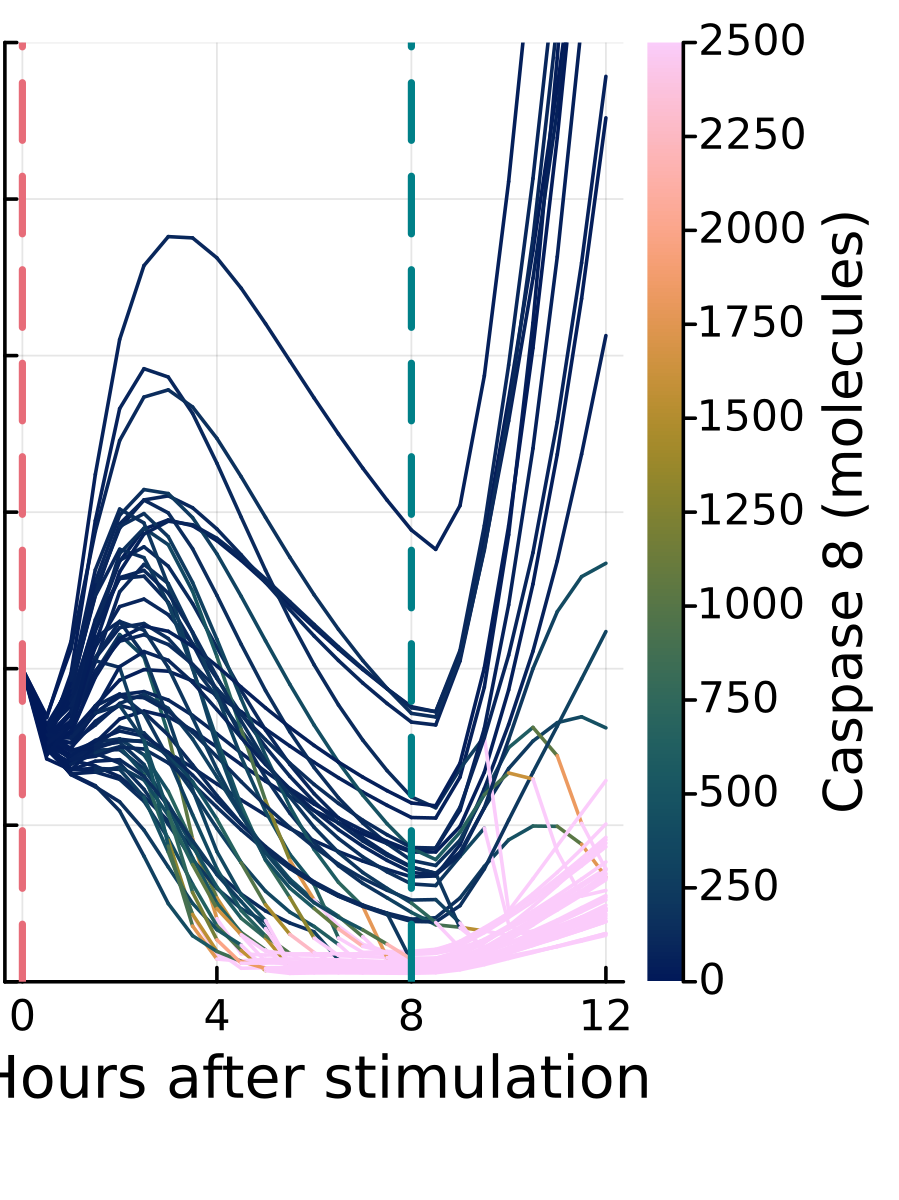

In [103]:
BclXL_plot = Plots.plot([0:0.5:time_range;], reduce(hcat, NFkBMatrix[BCL2])[1:(2*time_range+1), 1:50], linez=reduce(hcat, NFkBMatrix[C8])[1:(2*time_range+1), 1:50], 
xlabel="Hours after stimulation", thickness_scaling = 1.2, xticks = ([0:4:time_range;]), yticks = ([0:1500:9000;]),
clim=(0, 2500), c=:batlow, colorbar=:true, colorbar_title=" \nCaspase 8 (molecules)", ylim=(0.0, 9000.0), 
legend = false, size=(300,400), dpi=300, right_margin = 5Plots.mm, left_margin = -10Plots.mm)
if !nostim
    vline!(BclXL_plot, [BCR_stim_time], line=:dash, color=BCRcolor, label="BCR stimulation", linewidth=2)
    vline!(BclXL_plot, [CD40_stim_time], line=:dash, color=CD40color, label="CD40 stimulation", linewidth=2)
end

In [104]:
out_fn2 = string(out_dir, dose, "BclXL.png")
savefig(out_fn2)

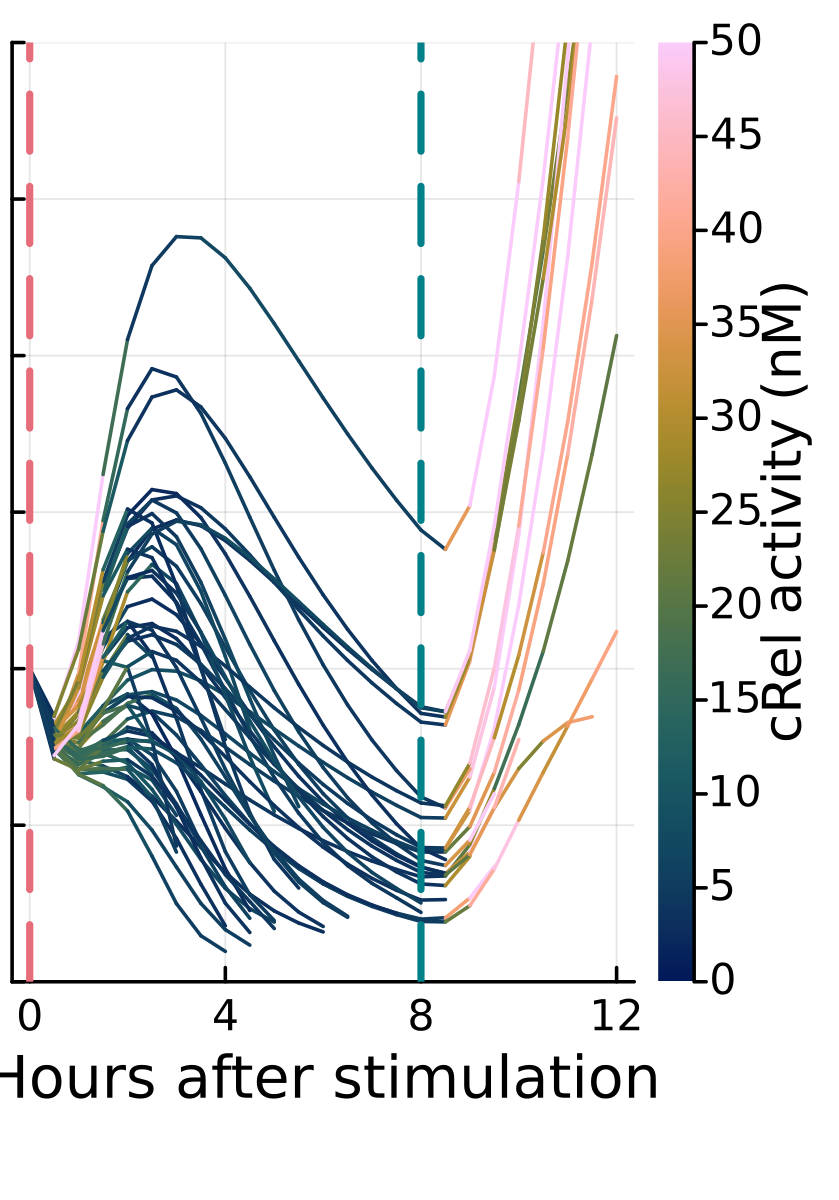

In [105]:
BclXL_plot = Plots.plot([0:0.5:time_range;], reduce(hcat, NFkBMatrix[BCL2])[1:(2*time_range+1), 1:50], linez=reduce(hcat, NFkBMatrix[NC50])[1:(2*time_range+1), 1:50]+reduce(hcat, NFkBMatrix[NC52])[1:(2*time_range+1), 1:50],
 xlabel="Hours after stimulation", thickness_scaling = 1.2, xticks = ([0:4:time_range;]), yticks = ([0:1500:9000;]),
 clim=(0, 50), seriesalpha=.!(reduce(hcat, NFkBMatrix[TOTAL_SPECIES])[1:(2*time_range+1), 1:50] .> 0), 
 c=:batlow, colorbar=:true, colorbar_title="cRel activity (nM)", ylim=(0.0, 9000.0), 
 legend = false, size=(280,400), dpi=300, right_margin = 0Plots.mm, left_margin = -9Plots.mm)
 
if !nostim
    vline!(BclXL_plot, [BCR_stim_time], line=:dash, color=BCRcolor, label="BCR stimulation", linewidth=2)
    vline!(BclXL_plot, [CD40_stim_time], line=:dash, color=CD40color, label="CD40 stimulation", linewidth=2)
end

In [106]:
out_fn2 = string(out_dir,dose, "cRel_n50.png")
savefig(out_fn2)

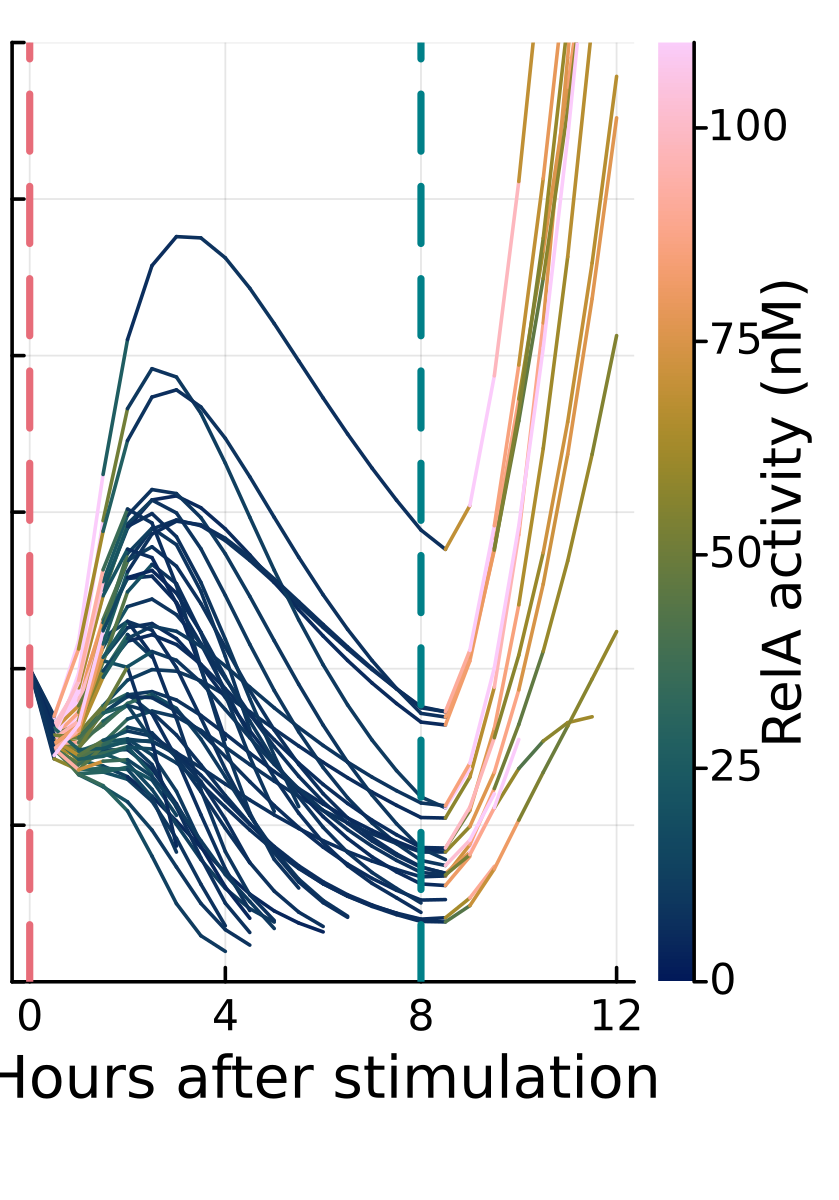

In [107]:
BclXL_plot = Plots.plot([0:0.5:time_range;], reduce(hcat, NFkBMatrix[BCL2])[1:(2*time_range+1), 1:50], linez=reduce(hcat, NFkBMatrix[NA50])[1:(2*time_range+1), 1:50]+reduce(hcat, NFkBMatrix[NA52])[1:(2*time_range+1), 1:50],
 xlabel="Hours after stimulation", thickness_scaling = 1.2, xticks = ([0:4:time_range;]), yticks = ([0:1500:9000;]),
 clim=(0, 110), seriesalpha=.!(reduce(hcat, NFkBMatrix[TOTAL_SPECIES])[1:(2*time_range+1), 1:50] .> 0), 
 c=:batlow, colorbar=:true, colorbar_title="RelA activity (nM)", ylim=(0.0, 9000.0), 
 legend = false, size=(280,400), dpi=300, right_margin = 0Plots.mm, left_margin = -9Plots.mm)
 
if !nostim
    vline!(BclXL_plot, [BCR_stim_time], line=:dash, color=BCRcolor, label="BCR stimulation", linewidth=2)
    vline!(BclXL_plot, [CD40_stim_time], line=:dash, color=CD40color, label="CD40 stimulation", linewidth=2)
end

In [108]:
out_fn2 = string(out_dir,dose, "RelA_n50.png")
savefig(out_fn2)